# RNN Cell Directionality Analysis

This notebook analyzes the effect of different RNN directionality on model performance

## Import Library

In [111]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout, TextVectorization, Embedding, Bidirectional
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, f1_score

## Preparation

### Load Data from CSV

In [112]:
train_df = pd.read_csv('../../../data/nusax/train.csv')
valid_df = pd.read_csv('../../../data/nusax/valid.csv')

### Preprocess Data

In [113]:
max_tokens = 5000
max_sequence_length = 54
text_vectorizer = TextVectorization(
    max_tokens=max_tokens,
    output_sequence_length=max_sequence_length,
    standardize='lower_and_strip_punctuation'
)

text_vectorizer.adapt(train_df['text'].values)

label_map = {'positive': 0, 'neutral': 1, 'negative': 2}
train_df['label'] = train_df['label'].map(label_map)
valid_df['label'] = valid_df['label'].map(label_map)

x_train = text_vectorizer(train_df['text'])
y_train = train_df['label']
x_val = text_vectorizer(valid_df['text'])
y_val = valid_df['label']

## Reset Seed Function for A Fair Comparison

In [114]:
def reset_seeds(seed=42):
    import random as python_random
    import numpy as np
    import tensorflow as tf

    python_random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)

## Model Training

Variants:
1. Unidirectional
2. Bidirectional

In [115]:
EPOCHS = 10
BATCH_SIZE = 128

### Variant 1: Unidirectional RNN

In [116]:
reset_seeds()
model_1 = Sequential([
    Embedding(max_tokens, 100, input_length=max_sequence_length),
    SimpleRNN(64),
    Dropout(0.2),
    Dense(3, activation='softmax')
])

model_1.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_1 = model_1.fit(
    x_train, y_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=(x_val, y_val)
)

Epoch 1/10


/Users/maulvizm/Education/Machine Learning/if3270-tubes-2/.venv/lib/python3.9/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.3200 - loss: 1.1124 - val_accuracy: 0.4500 - val_loss: 1.0701
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7357 - loss: 0.9205 - val_accuracy: 0.5100 - val_loss: 0.9997
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8167 - loss: 0.6980 - val_accuracy: 0.5100 - val_loss: 1.0232
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.9178 - loss: 0.5028 - val_accuracy: 0.6200 - val_loss: 0.9350
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9806 - loss: 0.3213 - val_accuracy: 0.6300 - val_loss: 0.9626
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9979 - loss: 0.2080 - val_accuracy: 0.6300 - val_loss: 0.9426
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 1.0000 - loss: 0.1376 - val_accuracy: 0.6300 - val_loss: 0.9241
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 1.0000 - loss: 0.0913 - val_accuracy: 0.6000 - val_loss: 0.9874
Epoch 9/10


### Variant 2: Bidirectional RNN

In [117]:
reset_seeds()
model_2 = Sequential([
    Embedding(max_tokens, 100, input_length=max_sequence_length),
    Bidirectional(SimpleRNN(64)),
    Dropout(0.2),
    Dense(3, activation='softmax')
])

model_2.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_2 = model_2.fit(
    x_train, y_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=(x_val, y_val)
)

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.3434 - loss: 1.1098 - val_accuracy: 0.4700 - val_loss: 1.0137
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6371 - loss: 0.9017 - val_accuracy: 0.5800 - val_loss: 0.9410
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7778 - loss: 0.7448 - val_accuracy: 0.5000 - val_loss: 0.9407
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8394 - loss: 0.6011 - val_accuracy: 0.6000 - val_loss: 0.8949
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9199 - loss: 0.4519 - val_accuracy: 0.6000 - val_loss: 0.8746
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9637 - loss: 0.2901 - val_accuracy: 0.5600 - val_loss: 0.9413
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9816 - loss: 0.1874 - val_accuracy: 0.5600 - val_loss: 0.9165
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9921 - loss: 0.1121 - val_accuracy: 0.5400 - val_loss: 0.9393


## Model Evaluation

In [118]:
def evaluate_model(model, x_val, y_val, history):
    y_pred = model.predict(x_val)
    y_pred_classes = y_pred.argmax(axis=1)
    
    f1 = f1_score(y_val, y_pred_classes, average='macro')
    print(classification_report(y_val, y_pred_classes))
    print(f"Macro F1-score: {f1:.4f}")

    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Training vs Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
    return f1

### Evaluate Training Loss and Validation Loss for Each Model

#### Model 1


Evaluating Model 1 (Unidirectional RNN):
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
              precision    recall  f1-score   support

           0       0.68      0.71      0.69        38
           1       0.46      0.46      0.46        24
           2       0.67      0.63      0.65        38

    accuracy                           0.62       100
   macro avg       0.60      0.60      0.60       100
weighted avg       0.62      0.62      0.62       100

Macro F1-score: 0.5998


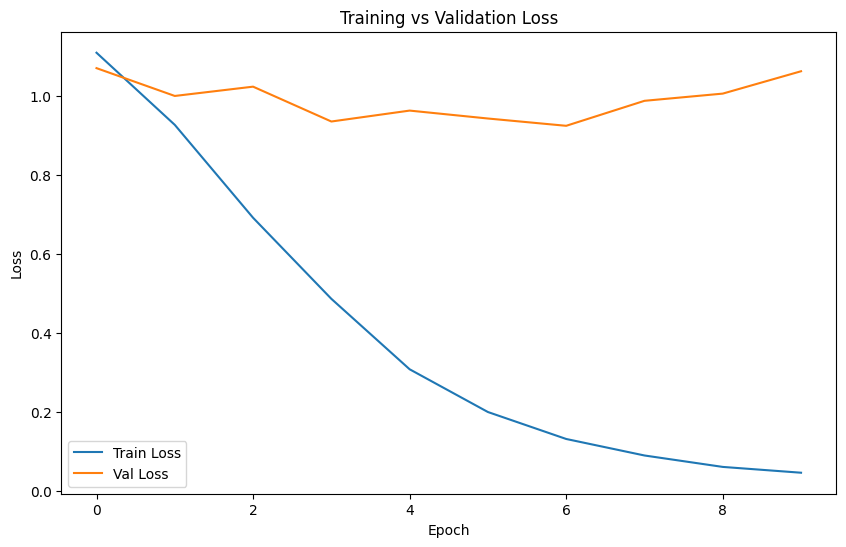

In [119]:
print("\nEvaluating Model 1 (Unidirectional RNN):")
f1_1 = evaluate_model(model_1, x_val, y_val, history_1)

#### Model 2


Evaluating Model 2 (Bidirectional RNN):
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
              precision    recall  f1-score   support

           0       0.68      0.71      0.69        38
           1       0.34      0.42      0.38        24
           2       0.58      0.47      0.52        38

    accuracy                           0.55       100
   macro avg       0.53      0.53      0.53       100
weighted avg       0.56      0.55      0.55       100

Macro F1-score: 0.5305


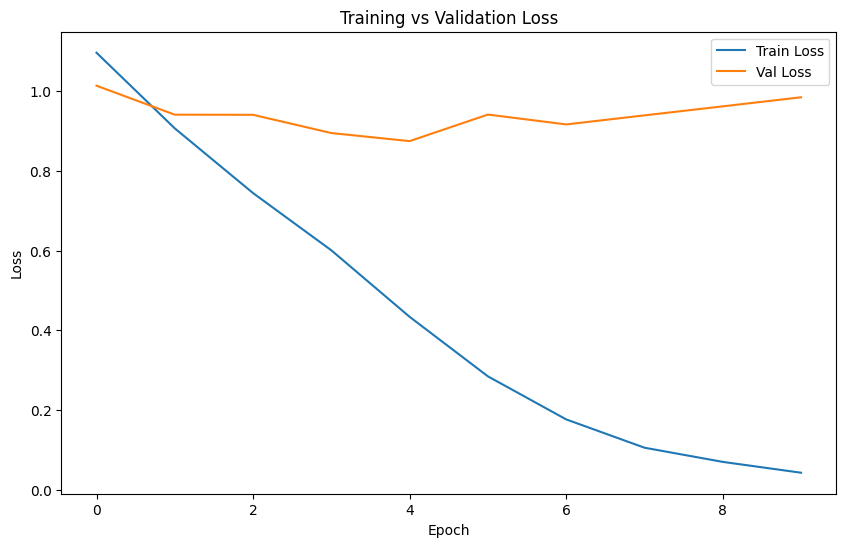

In [120]:
print("\nEvaluating Model 2 (Bidirectional RNN):")
f1_2 = evaluate_model(model_2, x_val, y_val, history_2)

### Validation Loss Comparison

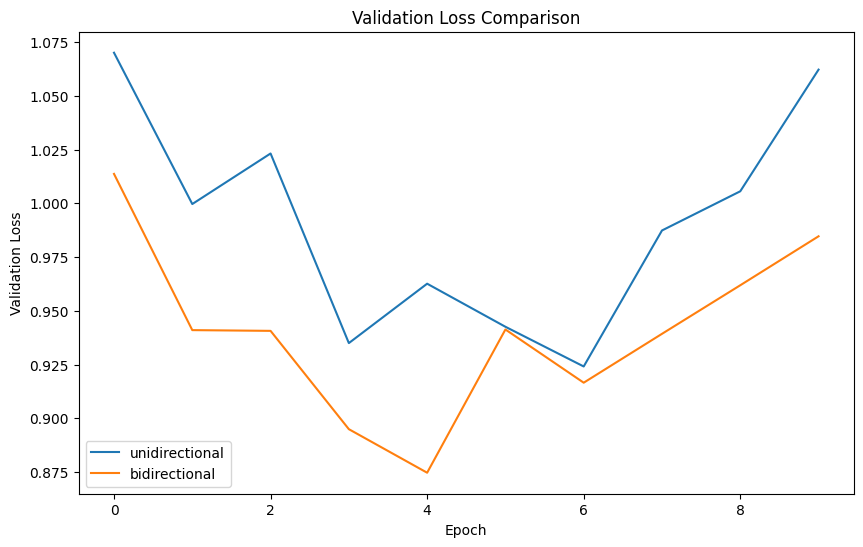

In [121]:
plt.figure(figsize=(10, 6))
plt.plot(history_1.history['val_loss'], label='unidirectional')
plt.plot(history_2.history['val_loss'], label='bidirectional')
plt.title('Validation Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()

### Training Loss Comparison

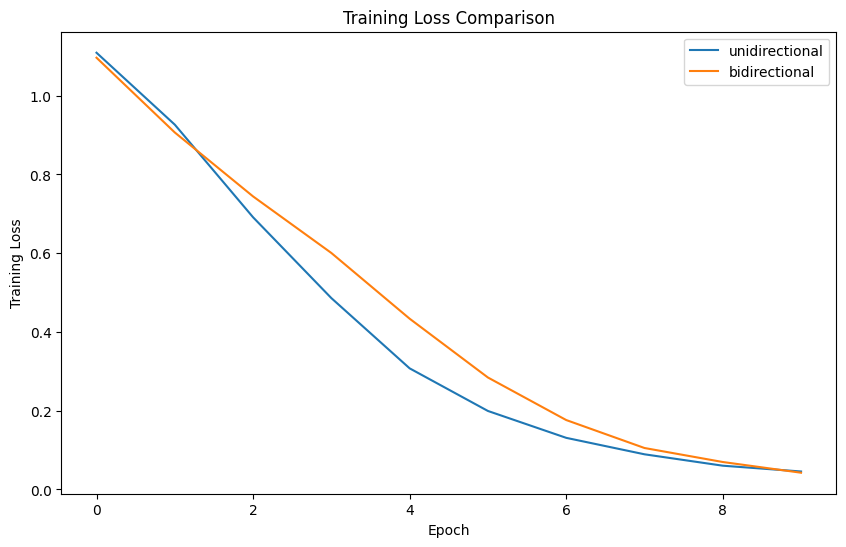

In [122]:
plt.figure(figsize=(10, 6))
plt.plot(history_1.history['loss'], label='unidirectional')
plt.plot(history_2.history['loss'], label='bidirectional')
plt.title('Training Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend()
plt.show()

### Accuracy Comparison

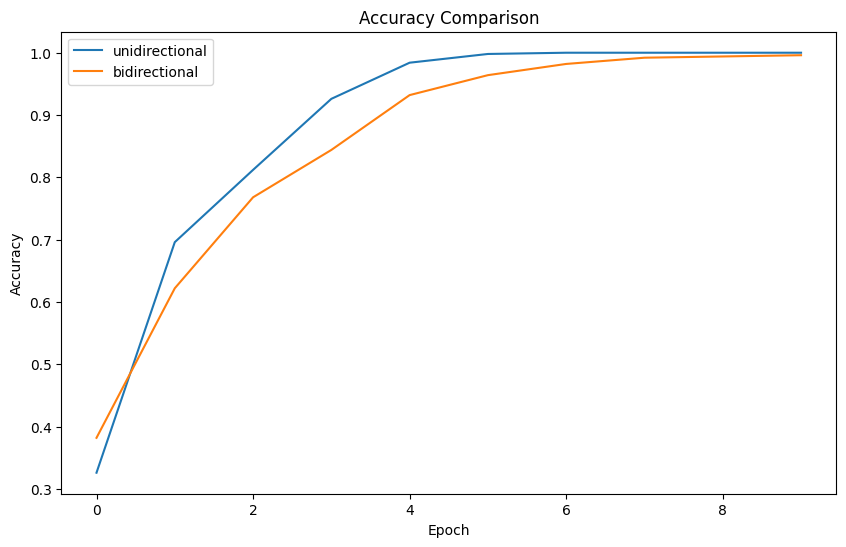

In [123]:
plt.figure(figsize=(10, 6))
plt.plot(history_1.history['accuracy'], label='unidirectional')
plt.plot(history_2.history['accuracy'], label='bidirectional')
plt.title('Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### F1 Score Comparison

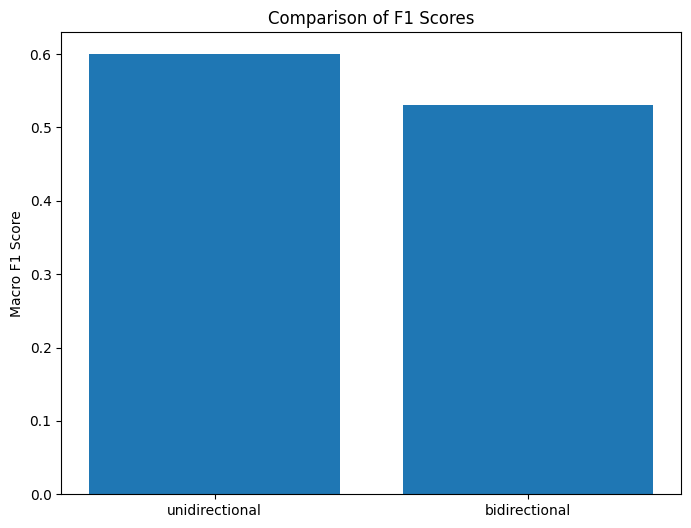

In [124]:
plt.figure(figsize=(8, 6))
plt.bar(['unidirectional', 'bidirectional'], [f1_1, f1_2])
plt.title('Comparison of F1 Scores')
plt.ylabel('Macro F1 Score')
plt.show()